<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("../data/supervised/election_dataset.csv")

In [3]:
df

,county_name,median_age,mean_savings,per_capita_income,percent_in_poverty,percent_veterans,percent_female,population_density,percent_in_nursing_homes,crime_index_PC,state,clinton_win
0,Autauga,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,AL,False
1,Baldwin,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,AL,False
2,Barbour,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,AL,True
3,Blount,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,AL,False
4,Bullock,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,AL,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,Sheridan,36.3,87232,22250,11.6,16.59,50.73,9.5,4.67,275,WY,False
2409,Sublette,35.4,83020,18748,7.9,12.18,47.98,1.0,8.60,432,WY,False
2410,Sweetwater,30.4,104346,19086,7.7,14.64,49.42,3.9,3.00,625,WY,True
2411,Washakie,34.6,114176,17608,11.7,14.47,49.65,3.8,8.47,313,WY,False


In [4]:
df.describe()

,median_age,mean_savings,per_capita_income,percent_in_poverty,percent_veterans,percent_female,population_density,percent_in_nursing_homes,crime_index_PC
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,34.400207,90326.450062,16374.190220,16.039039,11.492105,50.979043,178.689639,9.688367,303.092831
std,3.569727,40664.482147,3381.965731,6.699233,2.272614,1.472002,916.460524,6.160463,212.994761
min,20.000000,10618.000000,6118.000000,1.900000,2.780000,37.530000,0.400000,0.080000,0.000000
25%,32.400000,63439.000000,14183.000000,11.400000,9.920000,50.370000,18.200000,5.430000,149.000000
50%,34.200000,83682.000000,15944.000000,14.900000,11.550000,51.120000,41.600000,8.170000,263.000000
75%,36.400000,108226.000000,17860.000000,19.200000,13.050000,51.840000,100.500000,12.190000,411.000000
max,55.400000,631534.000000,37387.000000,52.000000,25.040000,55.390000,32360.300000,59.220000,2792.000000


In [5]:
df_savings_vote = df[['mean_savings', 'clinton_win']]

In [6]:
df.mean_savings

0        57623
1        84935
2        83656
3        61249
4        75725
         ...  
2408     87232
2409     83020
2410    104346
2411    114176
2412    132959
Name: mean_savings, Length: 2413, dtype: int64

In [7]:
df.corr()

,median_age,mean_savings,per_capita_income,percent_in_poverty,percent_veterans,percent_female,population_density,percent_in_nursing_homes,crime_index_PC,clinton_win
median_age,1.000000,0.359540,0.101816,-0.168699,0.542446,0.165718,-0.057944,0.499632,-0.262856,0.021728
mean_savings,0.359540,1.000000,0.396367,-0.235122,0.335320,0.172031,0.149548,0.417459,-0.104495,-0.068880
per_capita_income,0.101816,0.396367,1.000000,-0.621274,0.245551,0.054540,0.271253,-0.039274,0.256770,-0.144953
percent_in_poverty,-0.168699,-0.235122,-0.621274,1.000000,-0.345922,0.190793,-0.012427,-0.054604,0.065128,0.270434
percent_veterans,0.542446,0.335320,0.245551,-0.345922,1.000000,0.018526,-0.007615,0.341740,-0.082200,0.027842
percent_female,0.165718,0.172031,0.054540,0.190793,0.018526,1.000000,0.110642,0.147836,0.065146,0.142058
population_density,-0.057944,0.149548,0.271253,-0.012427,-0.007615,0.110642,1.000000,-0.113666,0.377132,0.066899
percent_in_nursing_homes,0.499632,0.417459,-0.039274,-0.054604,0.341740,0.147836,-0.113666,1.000000,-0.350141,0.013308
crime_index_PC,-0.262856,-0.104495,0.256770,0.065128,-0.082200,0.065146,0.377132,-0.350141,1.000000,0.045764
clinton_win,0.021728,-0.068880,-0.144953,0.270434,0.027842,0.142058,0.066899,0.013308,0.045764,1.000000


# Trying base AI

## Getting the Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(["clinton_win", "county_name", "state"], axis=1)

In [10]:
y = df["clinton_win"].values

## Transforming the data

In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [12]:
X

,0,1,2,3,4,5,6,7,8
0,0.330508,0.075703,0.308612,0.265469,0.357592,0.777156,0.001854,0.038553,0.163682
1,0.437853,0.119689,0.346541,0.233533,0.312219,0.773236,0.002043,0.089956,0.101003
2,0.361582,0.117629,0.301065,0.461078,0.271339,0.867861,0.000878,0.117349,0.016834
3,0.409605,0.081542,0.278295,0.261477,0.309524,0.762598,0.001916,0.038553,0.066261
4,0.330508,0.104856,0.159967,0.620758,0.193172,0.740761,0.000532,0.047853,0.050501
...,...,...,...,...,...,...,...,...,...
2408,0.460452,0.123389,0.515910,0.193613,0.620395,0.739082,0.000281,0.077612,0.098496
2409,0.435028,0.116605,0.403914,0.119760,0.422282,0.585106,0.000019,0.144065,0.154728
2410,0.293785,0.150951,0.414724,0.115768,0.532794,0.665733,0.000108,0.049374,0.223854
2411,0.412429,0.166783,0.367457,0.195609,0.525157,0.678611,0.000105,0.141867,0.112106


## Splitting The data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [28]:
from sklearn import svm

In [29]:
clf = svm.SVC()

In [30]:
clf.fit(X_train, y_train)

SVC()

In [31]:
clf.score(X_test, y_test)

0.6499372647427855

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=3000)

In [34]:
clf.fit(X_train, y_train)

SGDClassifier(max_iter=3000, penalty='elasticnet')

In [35]:
clf.score(X_test, y_test)

0.6235884567126725

In [36]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

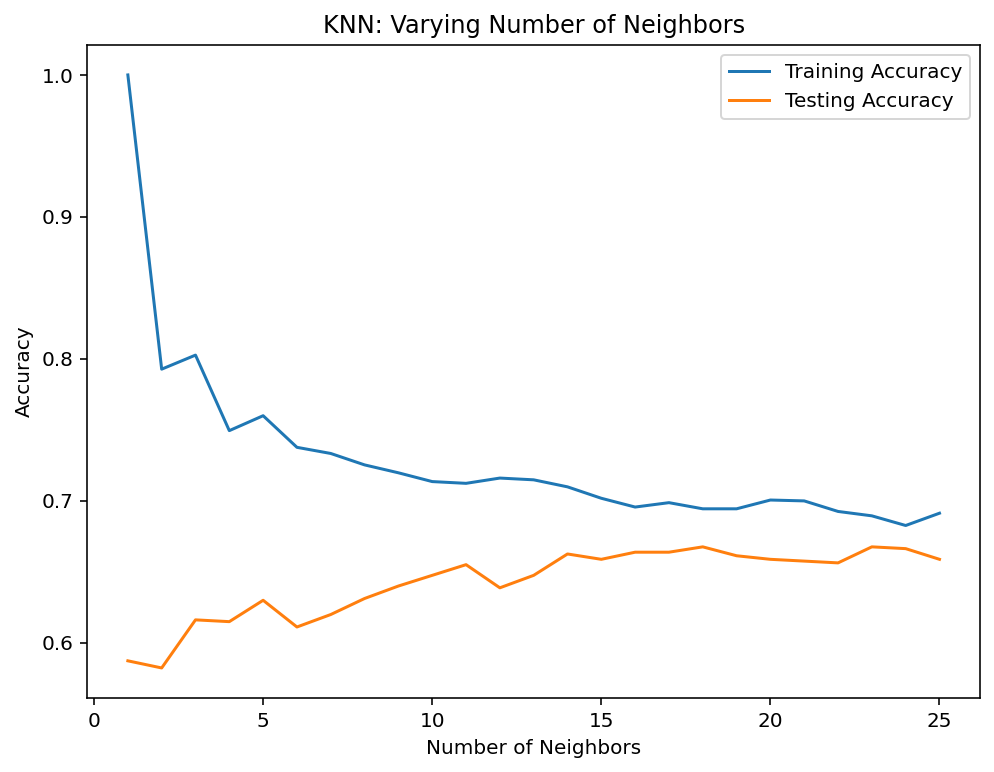

In [37]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[290 113]
 [152 242]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.66      0.72      0.69       403
        True       0.68      0.61      0.65       394

    accuracy                           0.67       797
   macro avg       0.67      0.67      0.67       797
weighted avg       0.67      0.67      0.67       797



In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

y_pred = logreg.predict(X_test)

0.5322322288984715


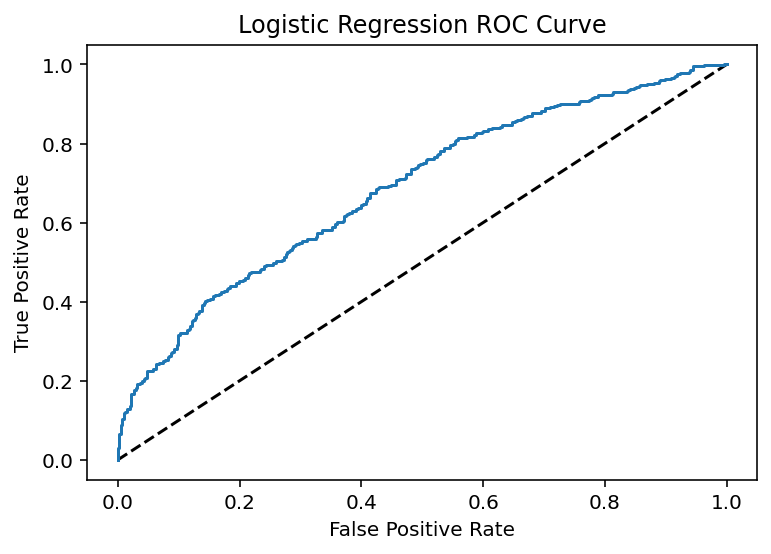

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs)

0.6863309443135872

In [62]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge


kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.07566561721971628


In [63]:
ridge_cv.score(X_test, y_test)

0.11821717988872105